# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [1]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [3]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [61]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [48]:
x = df['Level'].values
y = df['Salary'].values
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


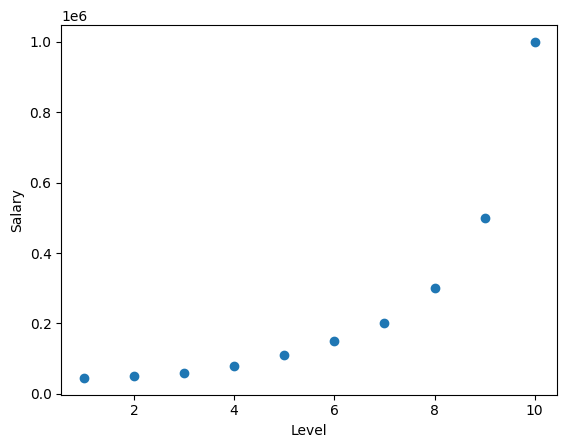

In [49]:
plt.scatter(x, y)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> No
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> No
* Explain why you said yes or no to the above questions.
> If we apply a linear model on a linear dataset, then it provides us a good result, but if we apply the same model without any modification on a non-linear dataset, then it will produce a drastic output. Due to which loss function will increase, the error rate will be high, and accuracy will be decreased. So for such cases, where data points are arranged in a non-linear fashion, we need the Polynomial Regression model.

## Polynomial Regression

**Construct a second order Model:**
$$\hat y_i = w_2x_i^2 + w_1x_i+b$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)=\frac{1}{N}\sum_{i=1}^N(y_i-(w_2x_{i}^2+w_1x_{i}+b))^2$$

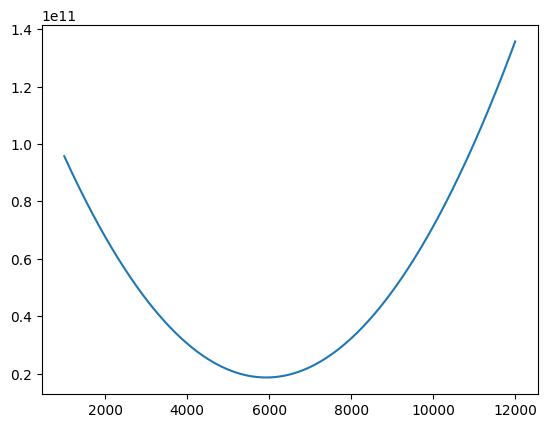

In [50]:
# your code to plot the cost function (if required)

w1 = np.linspace(1000,12000,500)
w2 = np.linspace(1000,12000,500)
b = 26816
N = x.size
MSE = np.empty(w2.shape)
for i in range(500):
  MSE[i] = 1/N*np.sum((y-((x*x*w2[i])+(x*w1[i])+b))**2)
plt.plot(w2,MSE)

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * It is the most commonly used cost function in regression problems. It calculates the average squared difference between the predicted values and the actual values. MSE is used as a cost function primarily because of its convexity - meaning it has a single global minimum, differentiability - which allows for the computation of gradients, penalization of large errors - makes MSE sensitive to outliers, and mathematical simplicity - makes it easy to implement and compute.

**Derivatives of cost function:**

- *Derivative with respect to $w_2$:*

$$\frac{\partial MSE}{\partial w_2}=-\frac{2}{N}\sum_{i=1}^{N}(y_i-(w_2x_i^2+w_1x_i+b))x_i^2$$

- *Derivative with respect to $w_1$:*

$$\frac{\partial MSE}{\partial w_1}=-\frac{2}{N}\sum_{i=1}^{N}(y_i-(w_2x_i^2+w_1x_i+b))x_i$$

- *Derivative with respect to $b$:*

$$\frac{\partial MSE}{\partial b}=-\frac{2}{N}\sum_{i=1}^{N}(y_i-(w_2x_i^2+w_1x_i+b))$$

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$$w_2:=w_2-\alpha\frac{\partial MSE}{\partial w_2}$$

$$w_1:=w_1-\alpha\frac{\partial MSE}{\partial w_1}$$

$$b:=b-\alpha\frac{\partial MSE}{\partial b}$$

## Implementation of the model

In [38]:
# Write a code/ function to do the following

In [51]:
# function for your model
def model(w1,w2,b,x):
  pred=(w2*(x*x))+(w1*x)+b
  return pred

In [52]:
# a function for your cost function
def cost(w1,w2,b,x,y):
   N = x.size
   MSE = (1/N)*np.sum((y-((w2*x*x)+(w1*x)+b))**2)
   return MSE

In [53]:
# function to calculate the derivatives
def gradients(w1,w2,b,x,y):
  N = x.size
  dMSE_dw1 = -(2/N)*(np.sum((y-((w2*x*x)+(w1*x)+b))*x))
  dMSE_dw2 = -(2/N)*(np.sum((y-((w2*x*x)+(w1*x)+b))*(x*x)))
  dMSE_db = -(2/N)*(np.sum(y-((w2*x*x)+(w1*x)+b)))
  return dMSE_dw1,dMSE_dw2,dMSE_db

In [54]:
# code to estimate the parametes using gradient descent
# Aslo estimate the cost function in each iteration
alpha = 0.00001
w1 = 1
w2 = 1
b = 2
M = 30000
costlist=[]
for i in range(M):
  dMSE_dw1,dMSE_dw2,dMSE_db = gradients(w1,w2,b,x,y)
  w1 = w1 - alpha*dMSE_dw1
  w2 = w2 - alpha*dMSE_dw2
  b = b - alpha*dMSE_db
  costlist.append(cost(w1,w2,b,x,y))
print('The value of w1, w2, b after ',M,' iterations are:', w1,w2,b)
y_pred=model(w1,w2,b,x)

The value of w1, w2, b after  30000  iterations are: -32754.000965275074 11043.17469106842 -2573.3669274211256


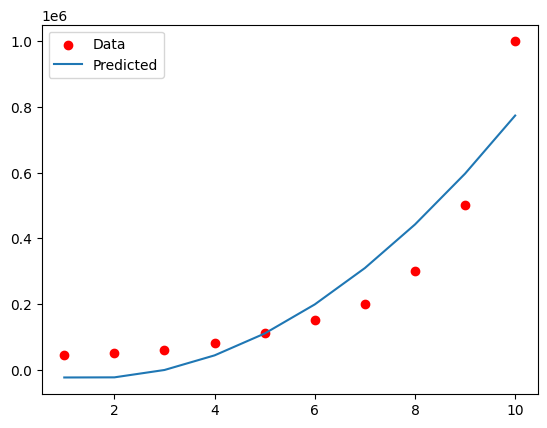

In [56]:
# Plot the model with the data given
plt.scatter(x, y, color = 'red', label='Data')
plt.plot(x,y_pred,label='Predicted')
plt.legend()
plt.show()

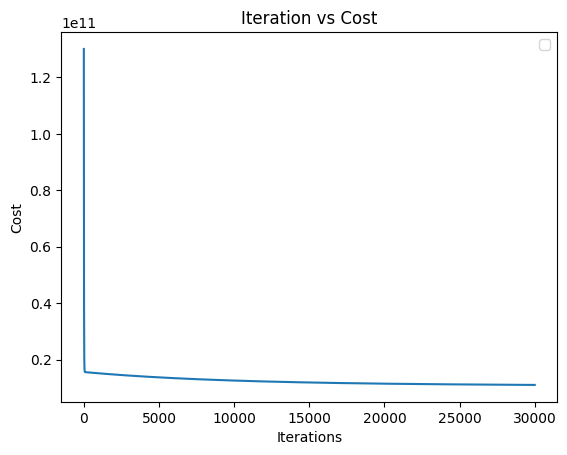

In [57]:
# plot the iteration VS cost
plt.figure()
plt.plot(range(M), costlist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Iteration vs Cost')
plt.legend()
plt.show()

In [58]:
# estimate the solution to the given problem
def predict_salary(w1,w2,b,level):
    salary = model(w1,w2,b,level)
    return salary
levels_to_predict = np.array([7,7.5,8])
predicted_salaries = predict_salary(w1,w2,b,levels_to_predict)
print("Predicted salaries are:")
for i in range(3):
   print('Level',levels_to_predict[i],'-',round(predicted_salaries[i]))

Predicted salaries are:
Level 7.0 - 309264
Level 7.5 - 372950
Level 8.0 - 442158


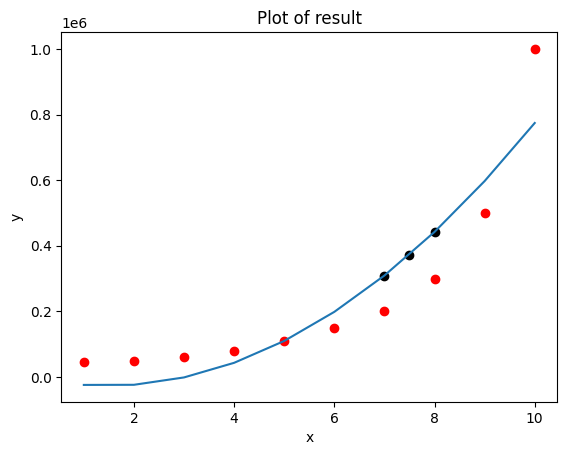

In [59]:
# mark the point or result in the graph (plot)
plt.scatter(x,y,color='red',label='Data')
plt.scatter(levels_to_predict,predicted_salaries,color='black')
plt.plot(x,y_pred,label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of result')
plt.show()

In [60]:
# Estimate the model performance
y_mean = np.mean(y)
SST = np.sum((y - y_mean) ** 2)
SSE = np.sum((y - y_pred) ** 2)
r2 = 1 - (SSE / SST)
print("Calculated R-squared:", r2)

Calculated R-squared: 0.8632381438663573


### Answer the following

* What is learning rate?
> * The learning rate is a parameter that determines the size of the steps taken towards the minimum of the cost function. It controls how much to adjust the model's parameters with respect to the gradient of the cost function during each iteration.
* What will happen if the learning rate is too large?
> * A large learning rate can speed up the process but may cause overshooting and instability.
* What will happen if the learning rate is too small?
> * A very small learning rate can make the training process inefficient and time-consuming.
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * Model equation
> * Cost function
> * Derivatives of cost function
> * Gradient descent algorithm
> * Your answer